<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/3_Multi_Input_and_Output_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
input_1 = keras.Input(shape=(32,), name="i1")
input_2 = keras.Input(shape=(16,), name="i2")
input_3 = keras.Input(shape=(10,), name="i3")

my_concatenate_layer = layers.Concatenate(name="c1")([input_1, input_2, input_3])
my_dense_layer = layers.Dense(units=128, activation="relu", name="d1")(my_concatenate_layer)

output_1 = layers.Dense(units=1, activation="sigmoid", name="o1")(my_dense_layer)
output_2 = layers.Dense(units=10, activation = "softmax", name="o2")(my_dense_layer)

In [ ]:
model = keras.Model([input_1, input_2, input_3], [output_1, output_2], name="multi-output-model")

In [ ]:
model.summary()

Model: "multi-output-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 i1 (InputLayer)                [(None, 32)]         0           []                               
                                                                                                  
 i2 (InputLayer)                [(None, 16)]         0           []                               
                                                                                                  
 i3 (InputLayer)                [(None, 10)]         0           []                               
                                                                                                  
 c1 (Concatenate)               (None, 58)           0           ['i1[0][0]',                     
                                                                  'i2[0][0]',    

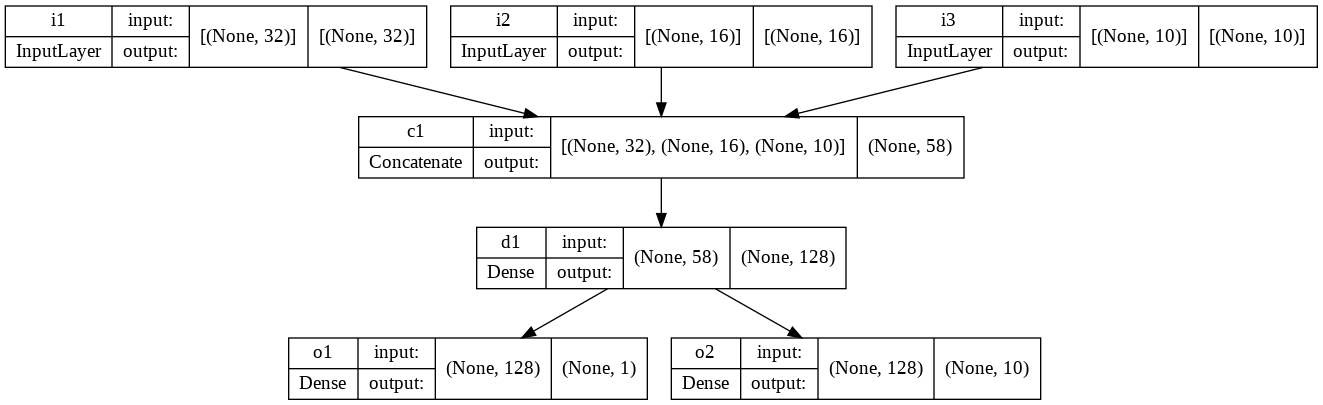

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.layers

In [ ]:
model.layers[3].input

[<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'i1')>,
 <KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'i2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'i3')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 58) dtype=float32 (created by layer 'c1')>

In [ ]:
import numpy as np

In [ ]:
num_of_records = 5000

In [ ]:
test_data_1 = np.random.randint(0, 2, size=(num_of_records, 32))

In [ ]:
test_data_1[0]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
test_data_2 = np.random.randint(0, 2, size = (num_of_records, 16))

In [ ]:
test_data_3 = np.random.randint(0, 2, size = (num_of_records, 10))

In [ ]:
test_label_1 = np.random.random(size=(num_of_records, 1))

In [ ]:
test_label_2 = np.random.randint(0,2, size=(num_of_records, 10))

In [ ]:
model.compile(optimizer = "rmsprop",
              loss = ["mean_squared_error","categorical_crossentropy"],
              metrics = [["mean_absolute_error"],["accuracy"]])

In [ ]:
model.compile(optimizer="rmsprop",
              loss={"o1": "mean_squared_error", "o2":"categorical_crossentropy"},
              metrics = {"o1": ["mean_absolute_error"], "o2":["accuracy"]})

In [ ]:
model.fit({"i1":test_data_1, "i2":test_data_2, "i3":test_data_3},
          {"o1":test_label_1, "o2":test_label_2}, epochs=5)

Epoch 1/5
157/157 [==============================] - 1s 2ms/step - loss: 18.0128 - o1_loss: 0.0914 - o2_loss: 17.9213 - o1_mean_absolute_error: 0.2568 - o2_accuracy: 0.0956
Epoch 2/5
157/157 [==============================] - 0s 2ms/step - loss: 24.0674 - o1_loss: 0.0980 - o2_loss: 23.9694 - o1_mean_absolute_error: 0.2626 - o2_accuracy: 0.1192
Epoch 3/5
157/157 [==============================] - 0s 2ms/step - loss: 23.1098 - o1_loss: 0.1094 - o2_loss: 23.0004 - o1_mean_absolute_error: 0.2747 - o2_accuracy: 0.1136
Epoch 4/5
157/157 [==============================] - 0s 2ms/step - loss: 22.3547 - o1_loss: 0.1275 - o2_loss: 22.2272 - o1_mean_absolute_error: 0.2937 - o2_accuracy: 0.1180
Epoch 5/5
157/157 [==============================] - 0s 2ms/step - loss: 20.6214 - o1_loss: 0.1422 - o2_loss: 20.4792 - o1_mean_absolute_error: 0.3069 - o2_accuracy: 0.1046


In [ ]:
model.evaluate([test_data_1, test_data_2, test_data_3],[test_label_1, test_label_2])

157/157 [==============================] - 1s 2ms/step - loss: 15.1366 - o-1_loss: 0.2635 - o-2_loss: 14.8731 - o-1_mean_absolute_error: 0.4334 - o-2_accuracy: 0.0290


[15.136634826660156,
 0.26352623105049133,
 14.873106002807617,
 0.43340829014778137,
 0.028999999165534973]

In [ ]:
pred_o1, pred_o2 = model.predict([test_data_1, test_data_2, test_data_3])